In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, other):
        return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

In [3]:
class Ant:
    def __init__(self, num_cities):
        self.tour = []
        self.total_distance = 0
        self.num_cities = num_cities

    def clear(self):
        self.tour = []
        self.total_distance = 0

In [4]:
def initialize_pheromone(num_cities, initial_pheromone):
    return np.ones((num_cities, num_cities)) * initial_pheromone

In [5]:
def calculate_visibility(cities):
    num_cities = len(cities)
    visibility = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                visibility[i][j] = 1.0 / cities[i].distance(cities[j])
    return visibility

In [6]:
def select_next_city(current_city, unvisited_cities, pheromone, visibility, alpha, beta):
    pheromone_values = np.array([pheromone[current_city][i] for i in unvisited_cities])
    visibility_values = np.array([visibility[current_city][i] for i in unvisited_cities])
    
    probabilities = (pheromone_values**alpha) * (visibility_values**beta)
    probabilities /= np.sum(probabilities)
    
    return np.random.choice(unvisited_cities, p=probabilities)

In [7]:
def construct_solution(ant, cities, pheromone, visibility, alpha, beta):
    num_cities = len(cities)
    ant.clear()
    start_city = np.random.randint(num_cities)
    ant.tour.append(start_city)
    
    unvisited_cities = list(range(num_cities))
    unvisited_cities.remove(start_city)
    
    current_city = start_city
    while unvisited_cities:
        next_city = select_next_city(current_city, unvisited_cities, pheromone, visibility, alpha, beta)
        ant.tour.append(next_city)
        ant.total_distance += cities[current_city].distance(cities[next_city])
        unvisited_cities.remove(next_city)
        current_city = next_city
    
    # Return to the starting city
    ant.total_distance += cities[current_city].distance(cities[start_city])

In [8]:
def update_pheromone(pheromone, ants, rho, Q):
    num_cities = pheromone.shape[0]
    # Evaporation
    pheromone *= (1 - rho)
    
    # Deposit
    for ant in ants:
        contribution = Q / ant.total_distance
        for i in range(len(ant.tour) - 1):
            from_city = ant.tour[i]
            to_city = ant.tour[i + 1]
            pheromone[from_city][to_city] += contribution
            pheromone[to_city][from_city] += contribution
        # Add contribution for the return to the start
        start_city = ant.tour[0]
        last_city = ant.tour[-1]
        pheromone[last_city][start_city] += contribution
        pheromone[start_city][last_city] += contribution

In [9]:
def aco_tsp(cities, num_ants, num_iterations, alpha, beta, rho, Q, initial_pheromone):
    num_cities = len(cities)
    pheromone = initialize_pheromone(num_cities, initial_pheromone)
    visibility = calculate_visibility(cities)
    
    best_distance = float('inf')
    best_tour = None
    
    for iteration in range(num_iterations):
        ants = [Ant(num_cities) for _ in range(num_ants)]
        
        for ant in ants:
            construct_solution(ant, cities, pheromone, visibility, alpha, beta)
        
        # Find the best ant of this iteration
        iteration_best_ant = min(ants, key=lambda x: x.total_distance)
        
        if iteration_best_ant.total_distance < best_distance:
            best_distance = iteration_best_ant.total_distance
            best_tour = iteration_best_ant.tour
        
        update_pheromone(pheromone, ants, rho, Q)
    
    return best_tour, best_distance

In [10]:
def plot_tour(cities, tour):
    x = [cities[i].x for i in tour] + [cities[tour[0]].x]
    y = [cities[i].y for i in tour] + [cities[tour[0]].y]
    plt.plot(x, y, 'ro-')
    plt.title('Best Tour Found by ACO')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Best tour: [0, 4, 1, 6, 9, 7, 2, 8, 3, 5]
Best distance: 290.3067737777875


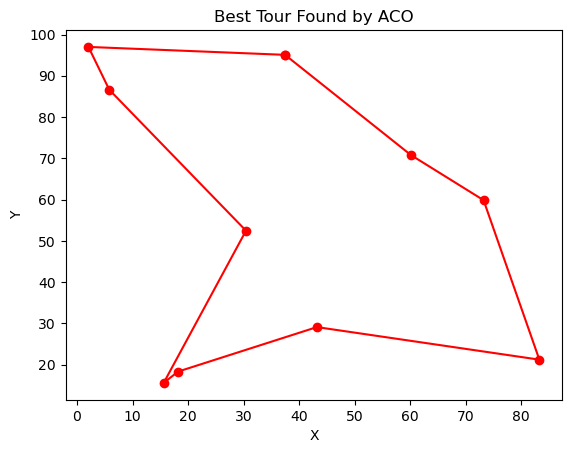

In [11]:
if __name__ == "__main__":
    np.random.seed(42)
    num_cities = 10
    cities = [City(np.random.uniform(0, 100), np.random.uniform(0, 100)) for _ in range(num_cities)]
    
    num_ants = 10
    num_iterations = 100
    alpha = 1
    beta = 2
    rho = 0.1
    Q = 100
    initial_pheromone = 1.0
    
    best_tour, best_distance = aco_tsp(cities, num_ants, num_iterations, alpha, beta, rho, Q, initial_pheromone)
    print(f"Best tour: {best_tour}")
    print(f"Best distance: {best_distance}")
    
    plot_tour(cities, best_tour)